<a href="https://colab.research.google.com/github/GabrielaRomoM/SIGNALS-THEORY_2024-1/blob/main/ModulationWaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

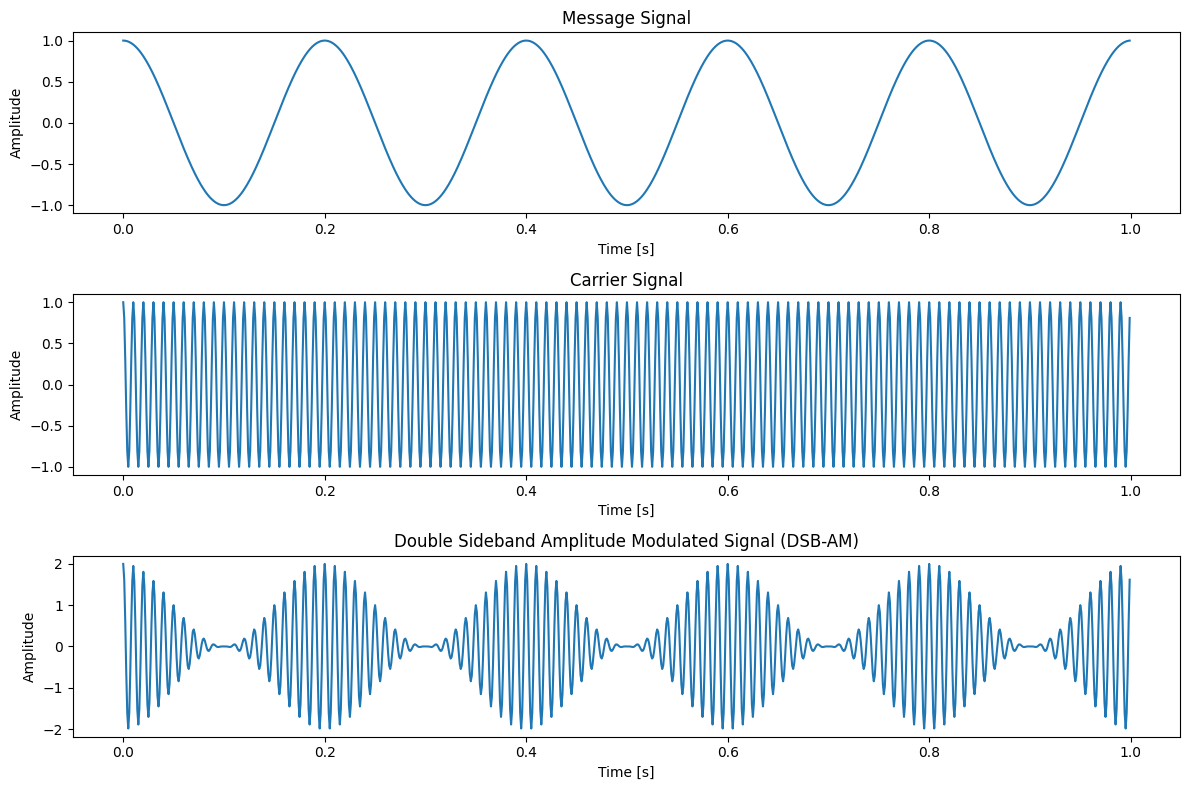

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/Fs)  # Time vector (1 second duration)

# Carrier signal (high frequency)
fc = 100  # Carrier frequency in Hz
carrier = np.cos(2 * np.pi * fc * t)

# Message signal (low frequency)
fm = 5  # Message frequency in Hz
message = np.cos(2 * np.pi * fm * t)

# Double Sideband Amplitude Modulation (DSB-AM)
modulated_signal = (1 + message) * carrier

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, message)
plt.title('Message Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, carrier)
plt.title('Carrier Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(t, modulated_signal)
plt.title('Double Sideband Amplitude Modulated Signal (DSB-AM)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

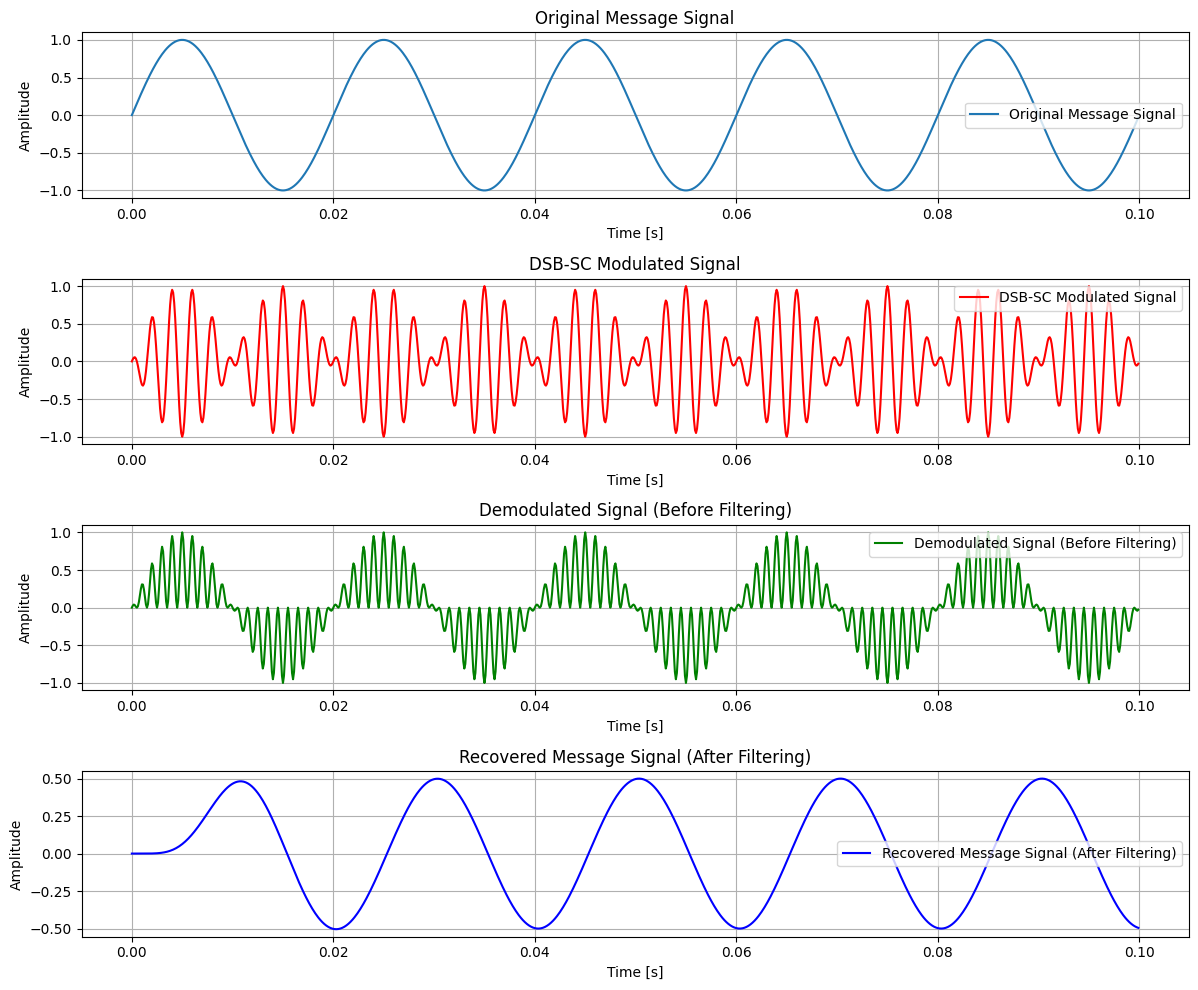

In [ ]:
from scipy.signal import butter, lfilter

# Parameters
fs = 10000  # Sampling frequency
fc = 500  # Carrier frequency
t = np.arange(0, 0.1, 1/fs)  # Time vector

# Message Signal (e.g., a sine wave)
fm = 50  # Message frequency
Am = 1  # Message amplitude
message_signal = Am * np.sin(2 * np.pi * fm * t)

# Carrier Signal
Ac = 1  # Carrier amplitude
carrier_signal = Ac * np.cos(2 * np.pi * fc * t)

# DSB-SC Modulated Signal
dsb_sc_signal = message_signal * carrier_signal

# Coherent Demodulation
# Multiply the DSB-SC signal with the local carrier
local_carrier = np.cos(2 * np.pi * fc * t)
demodulated_signal = dsb_sc_signal * local_carrier

# Design a low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Apply Low-pass filter to recover the message signal
cutoff = 100  # Cutoff frequency of the filter (should be > message frequency and < carrier frequency)
filtered_signal = butter_lowpass_filter(demodulated_signal, cutoff, fs)

# Plot the signals
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, message_signal, label='Original Message Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Original Message Signal')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, dsb_sc_signal, label='DSB-SC Modulated Signal', color='red')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('DSB-SC Modulated Signal')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(t, demodulated_signal, label='Demodulated Signal (Before Filtering)', color='green')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Demodulated Signal (Before Filtering)')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, filtered_signal, label='Recovered Message Signal (After Filtering)', color='blue')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Recovered Message Signal (After Filtering)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

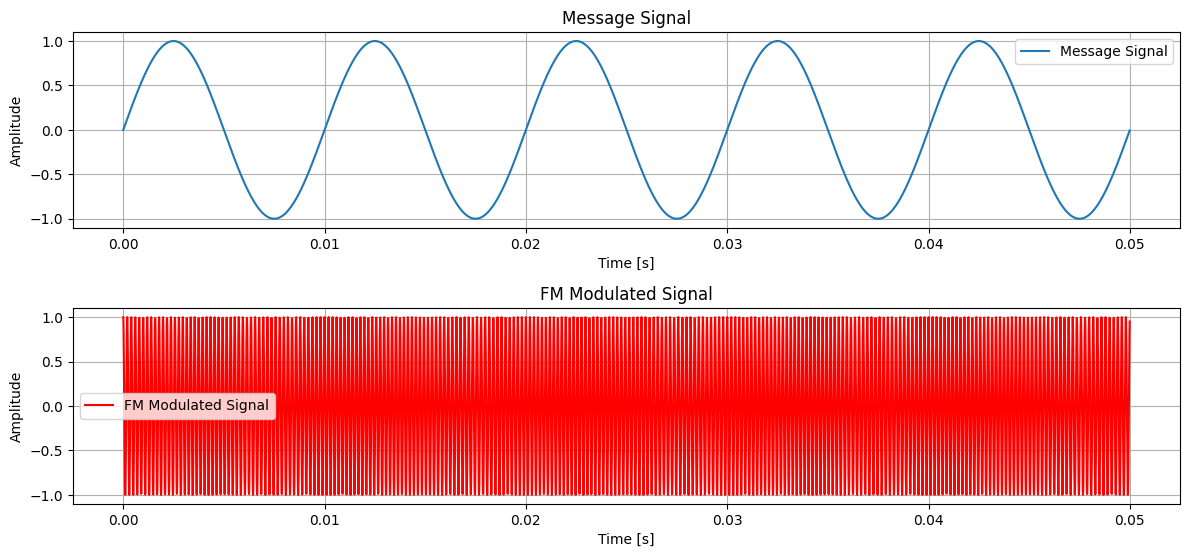

In [ ]:
# Parameters
fs = 100000  # Sampling frequency
fc = 5000  # Carrier frequency
kf = 100  # Frequency sensitivity (frequency deviation constant)
t = np.arange(0,0.05, 1/fs)  # Time vector

# Message Signal (e.g., a sine wave)
fm = 100  # Message frequency
Am = 1  # Message amplitude
message_signal = Am * np.sin(2 * np.pi * fm * t)

# Integral of the message signal (cumulative sum for approximation)
integrated_message = np.cumsum(message_signal) / fs

# FM Modulated Signal
carrier_signal = np.cos(2 * np.pi * fc * t + 2 * np.pi * kf * integrated_message)

# Plot the signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, message_signal, label='Message Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Message Signal')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, carrier_signal, label='FM Modulated Signal', color='red')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('FM Modulated Signal')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

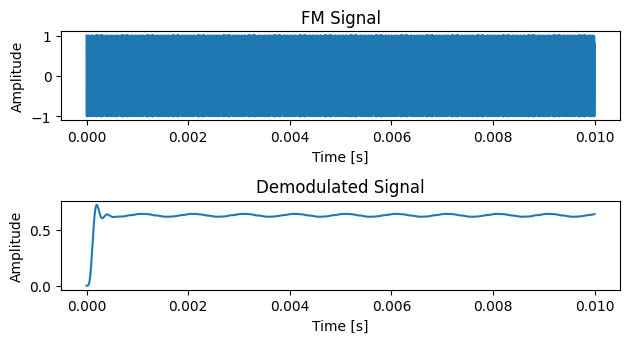

In [ ]:
# Generate a synthetic FM signal
def generate_fm_signal(carrier_freq, mod_freq, mod_index, sample_rate, duration):
    t = np.arange(0, duration, 1/sample_rate)
    modulating_signal = np.sin(2 * np.pi * mod_freq * t)  # Modulating signal
    fm_signal = np.cos(2 * np.pi * carrier_freq * t + mod_index * np.sin(2 * np.pi * mod_freq * t))
    return t, fm_signal

# Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# FM demodulation
def fm_demodulate(fm_signal, sample_rate, cutoff_freq):
    # Calculate the analytic signal
    analytic_signal = np.angle(fm_signal[1:] * np.conj(fm_signal[:-1]))

    # Unwrap phase
    demodulated_signal = np.unwrap(analytic_signal)

    # Apply low-pass filter to extract the baseband signal
    demodulated_signal = butter_lowpass_filter(demodulated_signal, cutoff_freq, sample_rate)
    return demodulated_signal

# Parameters
carrier_freq = 100e3      # Carrier frequency (100 kHz)
mod_freq = 1e3            # Modulating frequency (1 kHz)
mod_index = 2.0           # Modulation index
sample_rate = 1e6         # Sampling rate (1 MHz)
duration = 0.01           # Signal duration (10 ms)
cutoff_freq = 5e3         # Low-pass filter cutoff frequency (5 kHz)

# Generate FM signal
t, fm_signal = generate_fm_signal(carrier_freq, mod_freq, mod_index, sample_rate, duration)

# Demodulate FM signal
demodulated_signal = fm_demodulate(fm_signal, sample_rate, cutoff_freq)

# Plot the results
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, fm_signal)
plt.title("FM Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(t[1:], demodulated_signal)
plt.title("Demodulated Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

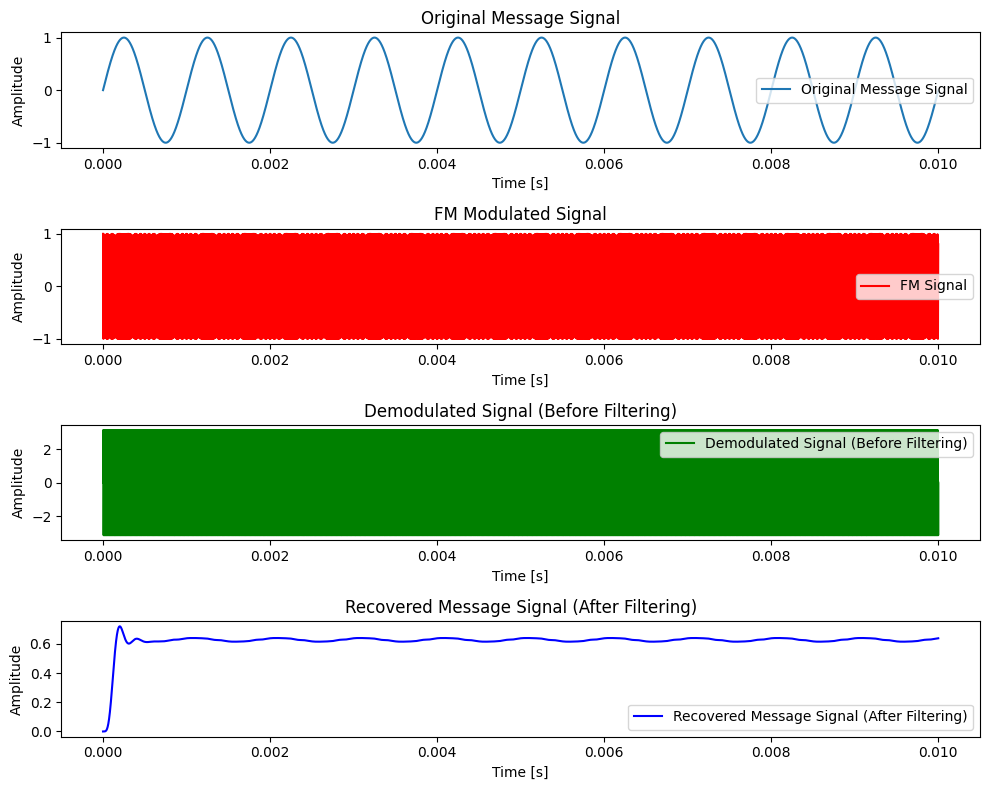

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Generate a synthetic FM signal
def generate_fm_signal(carrier_freq, mod_freq, mod_index, sample_rate, duration):
    t = np.arange(0, duration, 1/sample_rate)
    modulating_signal = np.sin(2 * np.pi * mod_freq * t)  # Modulating signal
    fm_signal = np.cos(2 * np.pi * carrier_freq * t + mod_index * np.sin(2 * np.pi * mod_freq * t))
    return t, modulating_signal, fm_signal

# Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# FM demodulation
def fm_demodulate(fm_signal, sample_rate, cutoff_freq):
    # Calculate the analytic signal
    analytic_signal = np.angle(fm_signal[1:] * np.conj(fm_signal[:-1]))

    # Unwrap phase
    demodulated_signal = np.unwrap(analytic_signal)

    # Apply low-pass filter to extract the baseband signal
    demodulated_signal = butter_lowpass_filter(demodulated_signal, cutoff_freq, sample_rate)
    return demodulated_signal

# Parameters
carrier_freq = 100e3      # Carrier frequency (100 kHz)
mod_freq = 1e3            # Modulating frequency (1 kHz)
mod_index = 2.0           # Modulation index
sample_rate = 1e6         # Sampling rate (1 MHz)
duration = 0.01    # Signal duration (10 ms)
cutoff_freq = 5e3         # Low-pass filter cutoff frequency (5 kHz)

# Generate FM signal
t, modulating_signal, fm_signal = generate_fm_signal(carrier_freq, mod_freq, mod_index, sample_rate, duration)

# Demodulate FM signal
demodulated_signal = fm_demodulate(fm_signal, sample_rate, cutoff_freq)

# Plot the results
plt.figure(figsize=(10, 8))

# Plot the modulating signal
plt.subplot(4, 1, 1)
plt.plot(t, modulating_signal, label="Original Message Signal")
plt.title("Original Message Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

# Plot the FM signal
plt.subplot(4, 1, 2)
plt.plot(t, fm_signal, color='red', label="FM Signal")
plt.title("FM Modulated Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

# Plot the demodulated signal (before filtering)
plt.subplot(4, 1, 3)
plt.plot(t[1:], np.diff(np.unwrap(np.angle(fm_signal))), color='green', label="Demodulated Signal (Before Filtering)")
plt.title("Demodulated Signal (Before Filtering)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

# Plot the recovered signal (after filtering)
plt.subplot(4, 1, 4)
plt.plot(t[1:], demodulated_signal, color='blue', label="Recovered Message Signal (After Filtering)")
plt.title("Recovered Message Signal (After Filtering)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b5cf4cd-e90f-4eb7-8a2a-747567c23a08' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>